![image.png](attachment:image.png)

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo.
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.metrics import confusion_matrix
import keras
import cv2
from google.colab import files

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras.



In [9]:
uploaded_0 = files.upload()

In [ ]:
import zipfile
import io
data= zipfile.ZipFile(io.BytesIO(uploaded_0['data_zip.zip']), 'r')
data.extractall()

In [27]:
#Leemos las rutas y añadimos a una lista todas las fotos

ruta_train_0 ="/content/data_zip/github_train_0"
ruta_train_1 ="/content/data_zip/github_train_1"
ruta_train_2 ="/content/data_zip/github_train_2"
ruta_train_3 ="/content/data_zip/github_train_3"
rutas_train = [ruta_train_0,ruta_train_1, ruta_train_2,ruta_train_3]
img_size = 32
lista_train = []
lista_train_y = []

for ruta in rutas_train:
  for img_name in os.listdir(ruta):
    #Ruta
    img_path = os.path.join(ruta, img_name)
    #Leer imagen
    img = cv2.imread(img_path)
    #Pasar a gris
    img_grey =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #Redimensionar imagen
    img_grey_resize = cv2.resize(img_grey,(img_size,img_size))
    #Añadir a la lista
    lista_train.append([img_grey_resize])
    #Obtener nombre del archivo
    label = os.path.splitext(img_name)[0]
    lista_train_y.append(label)

print(len(lista_train), len(lista_train_y))

4000 4000


In [28]:
#Convertimos la lista en una matriz
array_train = np.array(lista_train)
array_train.shape
array_train_y = np.array(lista_train_y)
array_train_y.shape

(4000,)

In [29]:
#Aplanamos la matriz
flatten_train = array_train.reshape(array_train.shape[0],-1)
flatten_train.shape
flatten_train_y = array_train_y.reshape(array_train_y.shape[0],-1)
flatten_train_y.shape

(4000, 1)

In [30]:
#Obtenemos el dataframe de train
X_train = pd.DataFrame(flatten_train)
X_train
y_train = pd.DataFrame(flatten_train_y)
y_train

,0
0,cat.424
1,cat.10037
2,cat.743
3,cat.1226
4,cat.3406
...,...
3995,dog.11918
3996,dog.10222
3997,dog.11139
3998,dog.12104


In [39]:
#Repetimos proceso para el test

ruta_test ="/content/data_zip/github_test"
img_size = 32
lista_test = []
lista_test_y = []

for img_name in os.listdir(ruta_test):
  #Ruta
  img_path = os.path.join(ruta_test, img_name)
  #Leer imagen
  img=cv2.imread(img_path)
  #Pasar a gris
  img_grey =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #Redimensionar
  img_grey_resize = cv2.resize(img_grey,(img_size,img_size))
  #Aañadir a la lista
  lista_test.append([img_grey_resize])
  #Obtener nombre del archivo
  label = os.path.splitext(img_name)[0]
  lista_test_y.append(label)

print(len(lista_test), len(lista_test_y))

1000 1000


In [47]:
#Convertimos la lista en una matriz
array_test = np.array(lista_test)
array_test.shape
array_test_y = np.array(lista_test_y)
array_test_y.shape

(1000,)

In [100]:
#Aplanamos la matriz
flatten_test = array_test.reshape(array_test.shape[0],-1)
flatten_test.shape
flatten_test_y = array_test_y.reshape(array_test_y.shape[0],-1)
flatten_test_y.shape

(1000, 1)

In [101]:
#Obtenemos el dataframe de train
X_test = pd.DataFrame(flatten_test)
X_test
y_test = pd.DataFrame(flatten_test_y)
y_test

,0
0,cat.11717
1,dog.9621
2,cat.11652
3,cat.11878
4,dog.8602
...,...
995,cat.11781
996,cat.11441
997,cat.12228
998,cat.12051


In [53]:
X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,228,230,229,232,227,224,211,204,214,128,...,240,242,244,245,242,238,240,236,232,223
1,158,161,161,175,145,92,110,157,156,141,...,24,27,27,15,16,24,18,60,92,102


In [54]:
y_train.head(2)

,0
0,cat.424
1,cat.10037


In [55]:
X_test.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,20,17,22,19,27,29,28,43,52,48,...,159,162,158,150,161,171,155,145,150,139
1,124,130,128,131,131,132,134,135,136,137,...,155,169,167,149,150,146,134,163,161,156


In [57]:
y_test.head(2)

,0
0,cat.11717
1,dog.9621


In [60]:
#CREAR MODELO DL CON DOS JUEGOS DE REDES CONVOLUCIONAL - POOLING
#1. VISUALIZACIÓN DATASET
#2. MINIEDA
#3. CONSTRUCCION DEL MODELO

In [102]:
def show_images_batch(imagenes, names = [], n_cols = 5, size_scale = 2, max_imagenes= 10):
    #Limitar el numero de imagenes a ver
    imagenes = imagenes[:max_imagenes]
    names = names[:max_imagenes]
    #Calcular el numero de filas
    n_cols = min(n_cols, len(imagenes))
    n_rows = ((len(imagenes) - 1) // n_cols + 1)
    #Configurar el tamaño de la figura
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1*size_scale))
    #Iterar
    for index, imagen in enumerate(imagenes):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(imagen, cmap = "Greys")
        plt.axis("off")
        if len(names):
            plt.title(names[index])
    plt.show()

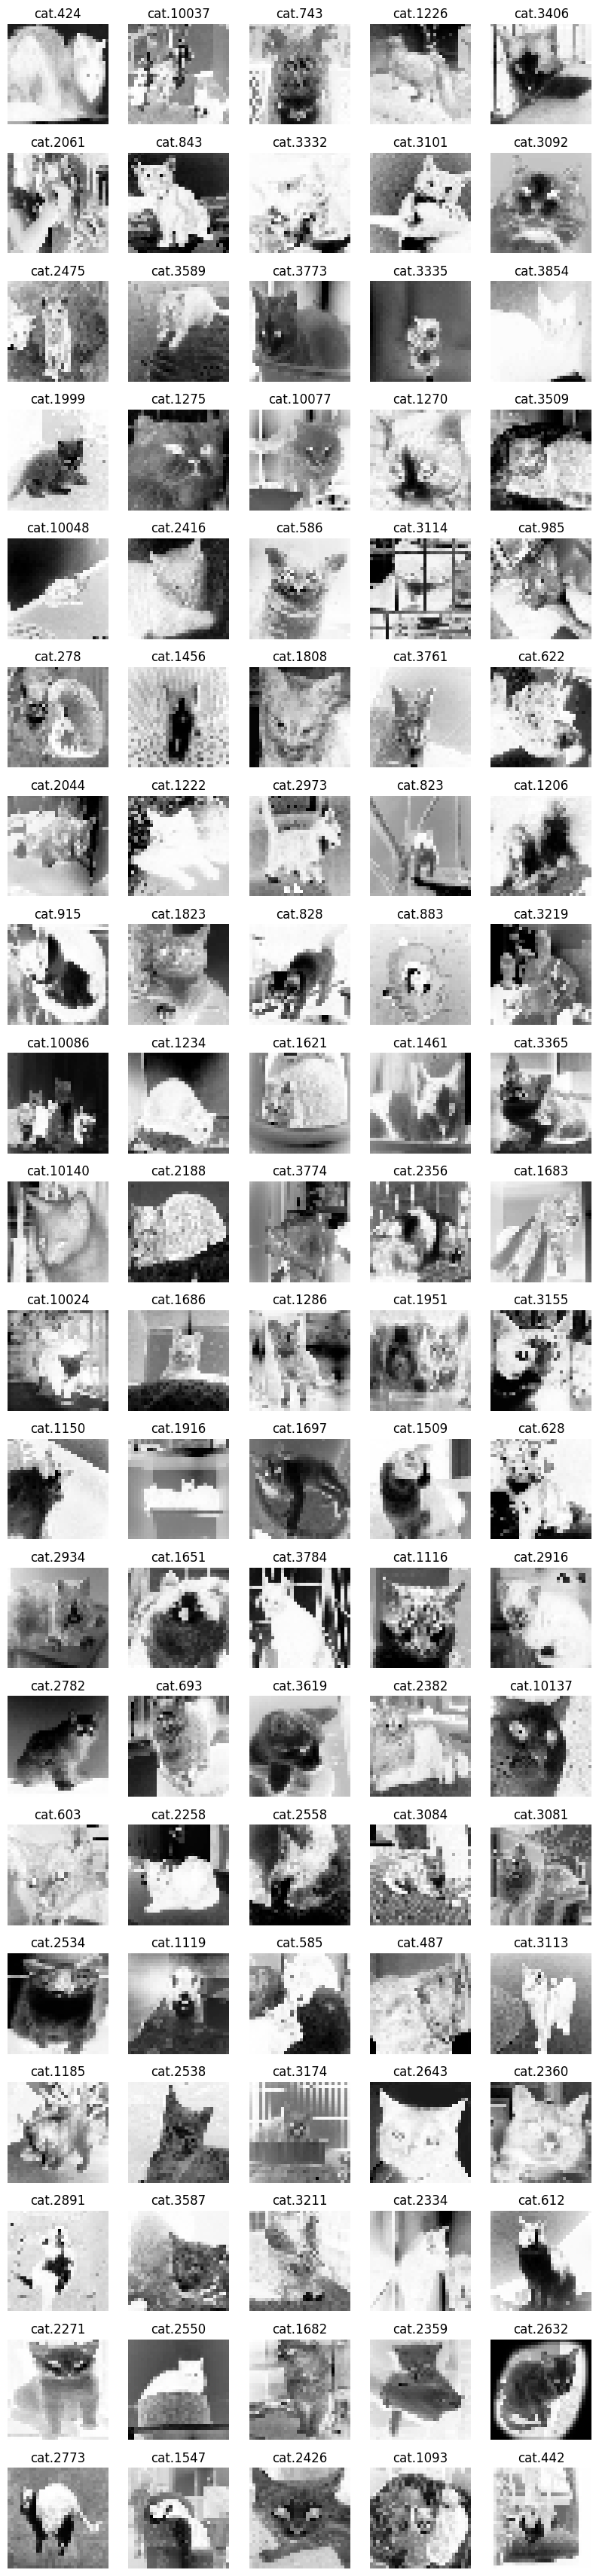

In [80]:
show_images_batch(np.squeeze(array_train), y_train.squeeze(), n_cols = 5, size_scale = 2, max_imagenes=100)

In [104]:
def asignar_clase(palabra):
    if 'cat' in palabra:
        return 0
    elif 'dog' in palabra:
        return 1
    else:
        return "unkown"  # Puedes ajustar esto según lo que desees para otros casos

# Aplicar la función a la columna y crear una nueva columna
try:
    y_train['target'] = y_train[0].apply(asignar_clase)
    y_train.drop(columns=[0], inplace=True)
except KeyError:
    print("Column '0' not found in y_train. It might have been already processed.")

try:
    y_test['target'] = y_test[0].apply(asignar_clase)
    y_test.drop(columns=[0], inplace=True)
except KeyError:
    print("Column '0' not found in y_test. It might have been already processed.")

Column '0' not found in y_train. It might have been already processed.


In [105]:
#MiniEDA - BALANCEADO
y_train['target'].value_counts()

,count
target,
0,2000
1,2000


In [112]:
#MODELO DL

In [113]:
#Normalizar el dataset
X_train = X_train/255
X_test = X_test/255

In [115]:
X_train.shape

(4000, 1024)

In [116]:
#Redimensionamos las imagenes:
X_train = X_train.values.reshape(-1,32,32,1)
X_test = X_test.values.reshape(-1,32,32,1)

In [117]:
# Primero definimos las capas de la red, en este caso partimos de 30 filtros de 3x3, seguido de una capa de pooling de 2x2,
# El input shape es el tamaño de las imágenes de entrada, en nuestro caso 32x32x3.
# El tamaño del kernel es pequeño pero suele ser de este tipo y más con resoluciones tan bajas, el número de filtros está escogido de aquella manera,
# juega con el número de filtros.

capas = [keras.layers.Conv2D(filters = 30,
                            kernel_size = (3, 3),
                            input_shape = (32,32,1),
                            padding = "same",
                            activation = 'relu'),
         keras.layers.MaxPooling2D(pool_size = (2, 2)),

# Añadimos otra capa de convolución y pooling
         keras.layers.Conv2D(filters = 15,
                             kernel_size = (3, 3),
                             padding = "same",
                             activation = 'relu'),
         keras.layers.MaxPooling2D(pool_size = (2, 2)),

# Añadimos una capa de flatten para convertir la salida de la capa de pooling en un vector
         keras.layers.Flatten(),

# Añadimos dos capas densas para la clasificación
         keras.layers.Dense(units = 150, activation = 'relu'),
         keras.layers.Dense(units = 100, activation = 'relu'),

# Añadimos la capa de salida con 6 neuronas, una por cada clase
         keras.layers.Dense(2, activation = 'softmax')]

# Creamos el modelo
model = keras.Sequential(capas)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [118]:
#Compilamos el modelo
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [119]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 30)          │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 15)          │           4,065 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 960)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 150)                 │         144,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          15,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 163,817 (639.91 KB)

 Trainable params: 163,817 (639.91 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
#Como los datos están ordenados tenemos que desordenarlos para que aprenda mejor
X_train, y_train = shuffle(X_train, y_train)

In [121]:
history = model.fit(X_train,
                    y_train,
                    validation_split = 0.2,
                    epochs = 100,
                    batch_size = 32,
                    callbacks= [keras.callbacks.EarlyStopping(patience = 10, restore_best_weights= True)])
# Queremos recuperar los pesos de la mejor de las epocas durante el periodo de patience

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.5124 - loss: 0.6948 - val_accuracy: 0.5663 - val_loss: 0.6770
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6199 - loss: 0.6528 - val_accuracy: 0.6025 - val_loss: 0.6670
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6634 - loss: 0.6137 - val_accuracy: 0.6687 - val_loss: 0.6180
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7042 - loss: 0.5756 - val_accuracy: 0.6587 - val_loss: 0.6139
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.7123 - loss: 0.5515 - val_accuracy: 0.6438 - val_loss: 0.6178
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7507 - loss: 0.5242 - val_accuracy: 0.6775 - val_loss: 0.6136
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.7833 - loss: 0.4510 - val_accuracy: 0.6737 - val_loss: 0.6196
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8177 - loss: 0.3928 - 

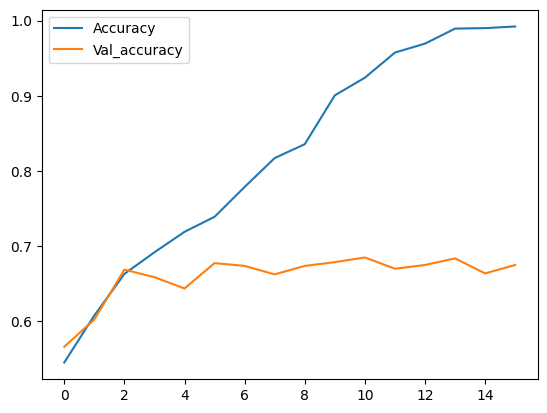

In [122]:
#Evaluacion de la métrica
# Representamos el objeto history
history_df = pd.DataFrame(history.history)
plt.plot(history_df['accuracy'], label = 'Accuracy')
plt.plot(history_df['val_accuracy'], label = 'Val_accuracy')

plt.legend();

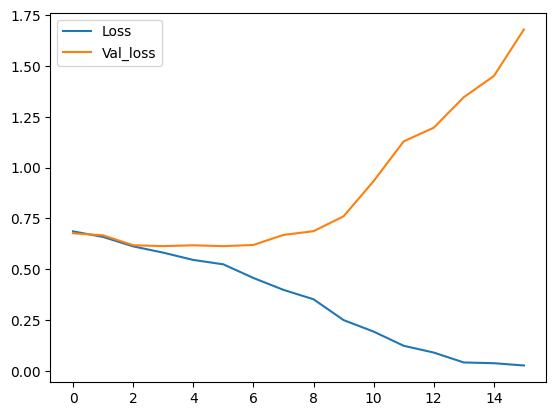

In [123]:
#Evolucion de la pérdida
plt.plot(history_df['loss'], label = 'Loss')
plt.plot(history_df['val_loss'], label = 'Val_loss')

plt.legend();

In [125]:
#EVALUACION DEL TEST
model.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6799 - loss: 0.6012


[0.6112614274024963, 0.6660000085830688]

In [126]:
y_pred = [ np.argmax(prediction) for prediction in model.predict(X_test)]

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [128]:
mapa = {"cat": 0,
        "dog": 1}

In [130]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
inverse_map = {valor:clave for clave,valor in mapa.items()}
y_test_labels = [inverse_map[y] for y in y_test["target"]]
y_pred_labels = [inverse_map[y] for y in y_pred]
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

         cat       0.64      0.76      0.69       500
         dog       0.70      0.58      0.63       500

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.66      1000
weighted avg       0.67      0.67      0.66      1000



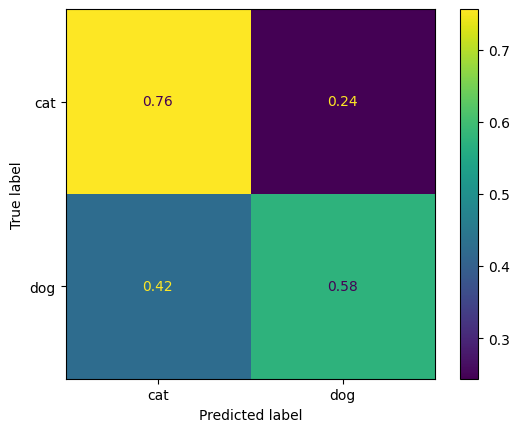

In [131]:
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_labels, normalize="true")

In [133]:
#IMAGENES CON ERRORES
#Probabilidades
y_pred_probs = model.predict(X_test)  # Get raw prediction probabilities

# Create a list of probabilities for the predicted class
y_pred_prob_values = [probs[np.argmax(probs)] for probs in y_pred_probs]

df_comparativo = pd.DataFrame({"y_test": y_test_labels,
                               "y_pred": y_pred_labels,
                               "y_pred_probs": y_pred_prob_values})
df_comparativo

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


,y_test,y_pred,y_pred_probs
0,cat,cat,0.564006
1,dog,dog,0.706626
2,cat,cat,0.817847
3,cat,cat,0.674661
4,dog,dog,0.544100
...,...,...,...
995,cat,cat,0.590575
996,cat,cat,0.661242
997,cat,cat,0.873329
998,cat,cat,0.923283


In [135]:
df_comparativo["error"] = df_comparativo["y_test"] != df_comparativo["y_pred"]
df_comparativo.head(2)

,y_test,y_pred,y_pred_probs,error
0,cat,cat,0.564006,False
1,dog,dog,0.706626,False


In [140]:
df_errores= df_comparativo.loc[df_comparativo["error"] == True]
df_errores.head(2)

,y_test,y_pred,y_pred_probs,error
5,dog,cat,0.776145,True
8,dog,cat,0.765002,True


In [146]:
df_errores.sort_values(by = "y_pred_probs", ascending = False)
df_errores_cat = df_errores.loc[df_errores["y_test"] == "cat"]
df_errores_dog = df_errores.loc[df_errores["y_test"] == "dog"]
df_errores_dog.head(2)

,y_test,y_pred,y_pred_probs,error
5,dog,cat,0.776145,True
8,dog,cat,0.765002,True


In [148]:
error10cat = df_errores_cat.sort_values(by = "y_pred_probs", ascending = False).head(17)
error10cat

,y_test,y_pred,y_pred_probs,error
491,cat,dog,0.883066,True
552,cat,dog,0.830398,True
742,cat,dog,0.828212,True
429,cat,dog,0.816354,True
77,cat,dog,0.810160,True
702,cat,dog,0.809335,True
752,cat,dog,0.801351,True
527,cat,dog,0.795415,True
29,cat,dog,0.791903,True
529,cat,dog,0.791536,True


In [149]:
error10dog = df_errores_dog.sort_values(by = "y_pred_probs", ascending = False).head(17)
error10dog

,y_test,y_pred,y_pred_probs,error
672,dog,cat,0.981574,True
564,dog,cat,0.974504,True
483,dog,cat,0.968205,True
798,dog,cat,0.954204,True
97,dog,cat,0.947547,True
791,dog,cat,0.946894,True
896,dog,cat,0.944523,True
106,dog,cat,0.936626,True
296,dog,cat,0.931964,True
49,dog,cat,0.930885,True
